In [ ]:
import os
os.chdir("../..")
print(os.getcwd())
import hamiltonian
import sympy as sp

ModuleNotFoundError: No module named 'hamiltonian'

# Example 1

This Jupyter notebook is intended to provide an example of using the `hamiltonian` package to generate the Hamiltonian for the Lagrangian given in Section II.C of "The First Variational Formula and the Ostrogradsky Formalism". The Lagrangian is given by

$L = -\frac{\epsilon m}{2\omega^2}\ddot{q}+\frac{m}{2}\dot{q}^2 - \frac{m\omega^2}{2}q^2$

and represents the Lagrangian for a simple harmonic oscillator with a small second-order perturbation.

In [ ]:
# Allow for pretty printing of sympy expressions
sp.init_printing()

# Define constants using sympy
m, epsilon, omega = sp.symbols('m epsilon omega', real=True, positive=True)

# Use the hamiltonian module to define a coordinate system
coordinate_system = hamiltonian.CoordinateSystem("t", ["q"])
t = coordinate_system.independent_variable
q = coordinate_system.get_coordinate("q")

display(t, q)

Use Sympy to define the Lagrangian:

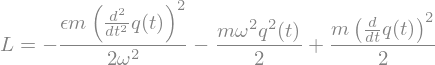

In [ ]:
L = - epsilon*m/(2*omega**2) * (q.diff(t,2))**2 + m/2 * (q.diff(t))**2 - m*omega**2/2 * q**2
sp.Eq(sp.Symbol("L"), L)

Use `hamiltonian.hamiltonian()` to compute the Hamiltonian using Ostrogradsky's formalism.

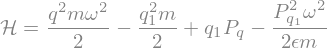

In [ ]:
# Compute Hamiltonian
phase_space = hamiltonian.hamiltonian(L, coordinate_system)
sp.Eq(sp.Symbol("\mathcal{H}"), phase_space.hamiltonian)

Use `hamiltonian.PhaseSpace.hamiltons_equations()` to compute Hamilton's Equations for the computed Hamiltonian.

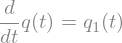

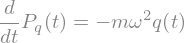

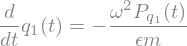

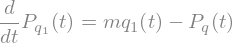

In [ ]:
hamiltons_equations = phase_space.hamiltons_equations()
for eq in hamiltons_equations:
    display(eq)

The equations given match the results of Section II.C with the following variable substitutions:

$(q,P_q) \rightarrow (Q^1, P_1)$

$(q_1, P_{q_1}) \rightarrow (Q^2, P_2)$
